In [1]:
pip install gekko

In [2]:
# Import required libraries
from gekko import GEKKO
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt


In [3]:
# Simple ODE example to verify GEKKO
m = GEKKO(remote=False)
m.time = np.linspace(0, 10, 100)

x = m.Var(1)
v = m.Var(0)

m.Equation(x.dt() == v)
m.Equation(v.dt() == -x)

m.solve(disp=False)

print("Simulation successful. Max displacement:", max(x.value))


Simulation successful. Max displacement: 0.0


In [4]:
# Parameter bounds
MASS_MIN, MASS_MAX = 0.5, 5.0
DAMPING_MIN, DAMPING_MAX = 0.1, 2.0
STIFFNESS_MIN, STIFFNESS_MAX = 1.0, 20.0


In [5]:
def run_simulation(mass, damping, stiffness, force):
    m = GEKKO(remote=False)
    m.time = np.linspace(0, 10, 200)

    m_param = m.Param(mass)
    c_param = m.Param(damping)
    k_param = m.Param(stiffness)
    f_param = m.Param(force)

    x = m.Var(0)
    v = m.Var(0)

    m.Equation(x.dt() == v)
    m.Equation(v.dt() == (f_param - k_param*x - c_param*v) / m_param)

    m.solve(disp=False)

    return max(np.abs(x.value))


In [6]:
FORCE_MIN, FORCE_MAX = 1.0, 20.0

data = []

for _ in range(1000):
    mass = random.uniform(MASS_MIN, MASS_MAX)
    damping = random.uniform(DAMPING_MIN, DAMPING_MAX)
    stiffness = random.uniform(STIFFNESS_MIN, STIFFNESS_MAX)
    force = random.uniform(FORCE_MIN, FORCE_MAX)

    max_disp = run_simulation(mass, damping, stiffness, force)
    data.append([mass, damping, stiffness, force, max_disp])

df = pd.DataFrame(
    data,
    columns=["Mass", "Damping", "Stiffness", "Force", "Max_Displacement"]
)


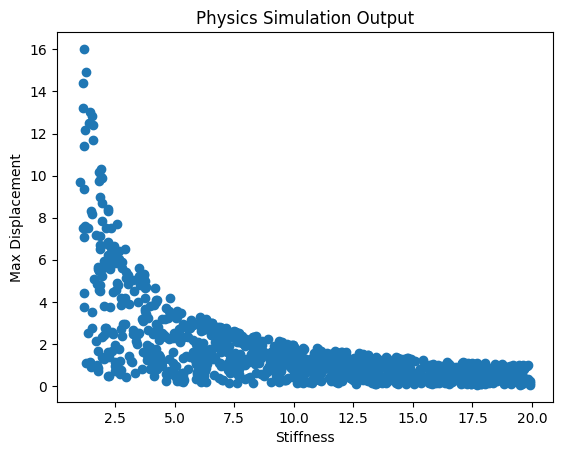

In [7]:
plt.scatter(df["Stiffness"], df["Max_Displacement"])
plt.xlabel("Stiffness")
plt.ylabel("Max Displacement")
plt.title("Physics Simulation Output")
plt.show()


In [8]:
X = df[["Mass", "Damping", "Stiffness"]]
y = df["Max_Displacement"]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [11]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}


In [12]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)

    results.append([name, mae, mse, rmse, r2])

results_df = pd.DataFrame(
    results,
    columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"]
)

results_df.sort_values(by="R2 Score", ascending=False)


,Model,MAE,MSE,RMSE,R2 Score
6,Support Vector Regressor,0.748087,1.606980,1.267667,0.603225
0,Linear Regression,0.946930,2.269792,1.506583,0.439572
1,Ridge Regression,0.946893,2.269821,1.506593,0.439565
2,Lasso Regression,0.919102,2.355014,1.534605,0.418530
5,Gradient Boosting,0.880247,2.755497,1.659969,0.319648
4,Random Forest,0.877189,2.786338,1.669233,0.312033
3,Decision Tree,1.040269,3.921663,1.980319,0.031714


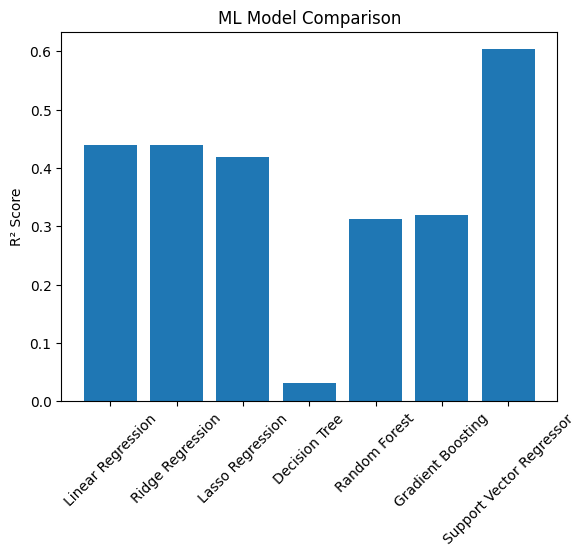

In [13]:
plt.bar(results_df["Model"], results_df["R2 Score"])
plt.xticks(rotation=45)
plt.ylabel("R² Score")
plt.title("ML Model Comparison")
plt.show()


In [14]:
results_df.to_csv("model_results.csv", index=False)
df.to_csv("simulationData.csv", index=False)
